In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [11]:
df.at[336, 'sex']= 'FEMALE'

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [13]:
X = pd.get_dummies(df.drop('species',axis=1), drop_first=True)  ### One hot encoding 

In [14]:
y = df['species']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [20]:
pred = rfc.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

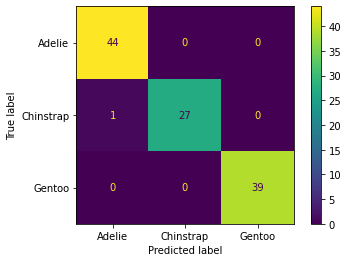

In [22]:
plot_confusion_matrix(rfc, X_test, y_test)

In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        44
   Chinstrap       1.00      0.96      0.98        28
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111



In [24]:
rfc.feature_importances_

array([0.38068233, 0.05266379, 0.20990681, 0.20247703, 0.13877877,
       0.01010753, 0.00538373])

In [25]:
X_train.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')